<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')
data.dropna(inplace=True)
data.head(2)

,,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group,AR2,Equivalent Diameter,Circ sqrt
0,169,210902_#4_100_30_1um_i002.tif:0124-0106,2977.920,438.884,94.390,40.169,85.995,0.194,113.371,102.0,147.0,79.919,53.536,2.350,0.426,0.654,0,0.472220,61.576014,0.44077
1,169,210902_#5_100_20_1um_i005.tif:0539-2012,2682.589,467.197,67.979,50.245,9.165,0.154,109.253,1990.0,535.0,177.397,74.108,1.353,0.739,0.476,0,0.678315,58.442950,0.39299


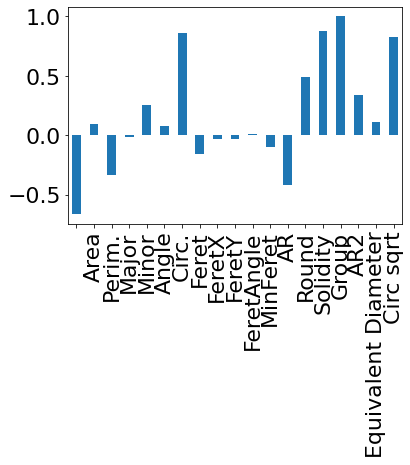

In [184]:
data.corr()['Group'].plot(kind='bar')

In [225]:
def preprocessing(df):
    df = df.copy()
    df = df.rename(columns={"Circ sqrt": "Circularity C",
                            'Equivalent Diameter':'Equivalent Diameter [nm]'})
    df = df.drop(['Label',' ','Minor','FeretX','FeretY','FeretAngle'],axis=1)
    df.dropna(inplace=True)
    y = df['Group']
    X = df.drop('Group',axis=1)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    #X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
    return X,y
X,y = preprocessing(data)

In [226]:
X

,Area,Perim.,Major,Angle,Circ.,Feret,MinFeret,AR,Round,Solidity,AR2,Equivalent Diameter [nm],Circularity C
0,0.447937,0.962833,0.903771,-0.062066,-1.246985,0.945852,0.610323,0.661859,-0.941596,-0.683978,-1.008594,0.789433,-1.243609
1,0.324311,1.096569,0.198498,-1.530606,-1.378701,0.854450,1.566255,-0.700714,0.711874,-1.626702,0.423065,0.649360,-1.454779
2,-0.448347,-0.217132,-0.391362,1.227355,-0.917696,-0.257215,-0.387802,0.152090,-0.518984,-0.980565,-0.525392,-0.504210,-0.794686
3,0.229017,0.777730,0.064392,-0.537091,-1.250278,0.269552,1.141169,-0.816881,0.976007,-0.991158,1.154329,0.536036,-1.249505
4,-0.049140,-0.083401,0.129255,1.037857,-0.318389,0.026133,0.152802,0.012690,-0.376352,-0.048434,-0.069816,0.171113,-0.142070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,-0.116104,-0.415901,-0.266708,-1.502087,1.235857,-0.400000,-0.033161,-0.867448,1.097508,1.111433,0.939040,0.073521,1.112146
1140,-0.430318,-0.589739,-0.625073,0.198766,1.114020,-0.659155,-0.494213,-0.867448,1.097508,1.037287,0.747062,-0.467126,1.025802
1141,-0.461225,-0.608784,-0.608036,-0.257126,1.074505,-0.674248,-0.609499,-0.648780,0.606221,0.862512,0.405053,-0.531287,0.998282
1142,-0.476678,-0.624518,-0.646115,0.153331,1.123899,-0.708740,-0.724739,-0.706181,0.722440,1.063768,0.149211,-0.564470,1.033790


In [227]:
from sklearn.cluster import SpectralClustering

In [228]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=466)
model.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=466)

In [229]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.labels_[model.labels_ == 2] = 1
print(confusion_matrix(y,model.labels_))
print(round(accuracy_score(y,model.labels_),2))

[[531  50]
 [ 10 553]]
0.95


In [230]:
legend_map = {0: 'Agglomerates',
              1: 'Spherical particles'
              }

In [231]:
y= y.map(legend_map)

In [232]:
model.labels_ = pd.DataFrame(model.labels_,columns=['Group'])
model.labels_['Group']= model.labels_['Group'].map(legend_map)
y_pred = model.labels_

In [233]:
X['Group_true'] = y
X['Group_pred'] = y_pred

In [234]:
print(confusion_matrix(y,y_pred))

[[531  50]
 [ 10 553]]


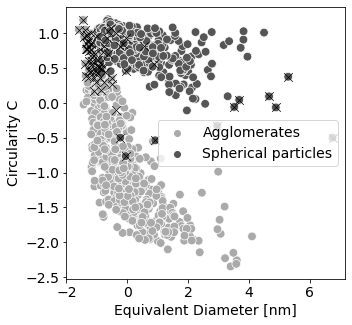

In [255]:
plt.figure(figsize=(5,5))
markers = {"Agglomerates": "s", "Spherical particles": "X"}
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=X,
                y='Circularity C',
                x='Equivalent Diameter [nm]',
                hue=y,
                s=75,
                palette = "binary",
               # fc="none",
               # edgecolor="black",
                )
sns.scatterplot(data=X[X['Group_true'] != X['Group_pred']],
                y='Circularity C',
                x='Equivalent Diameter [nm]',
                color='black',
                s=75,
                marker="x")

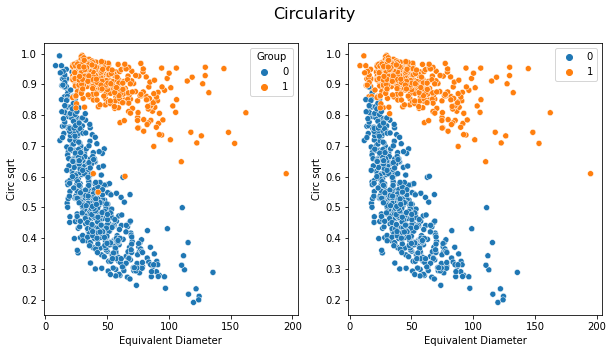

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Circularity', fontsize=16)
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

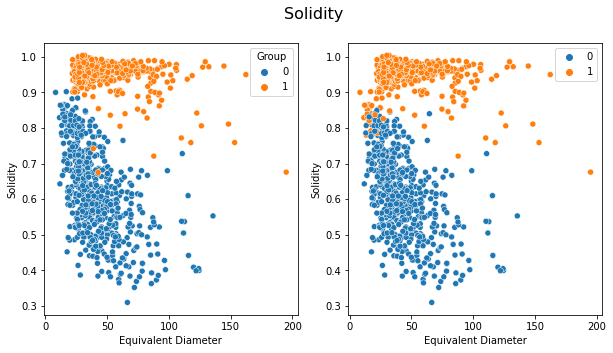

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Solidity', fontsize=16)
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = {'KNeighborsClassifier':KNeighborsClassifier(),
          'LogisticRegression':LogisticRegression(),
          'SVC': SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB()
         }

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
score = []
results = pd.DataFrame()
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score.append([name,accuracy_score(y_test,y_pred)])
    results[name] = model.predict(X)
score = pd.DataFrame(score, columns=['model name', 'Accuracy'])
score.sort_values('Accuracy',ascending=False)

,model name,Accuracy
0,KNeighborsClassifier,1.000000
1,LogisticRegression,1.000000
4,RandomForestClassifier,1.000000
5,AdaBoostClassifier,1.000000
2,SVC,0.995633
3,DecisionTreeClassifier,0.995633
6,GaussianNB,0.969432


In [25]:
results

,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GaussianNB
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1139,1,1,1,1,1,1,1
1140,1,1,1,1,1,1,1
1141,1,1,1,1,1,1,1
1142,1,1,1,1,1,1,1


In [26]:
len(results.columns)

7

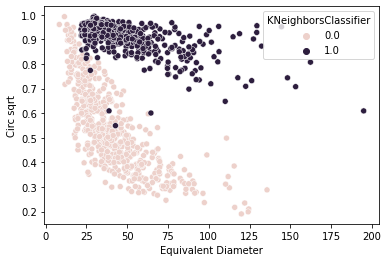

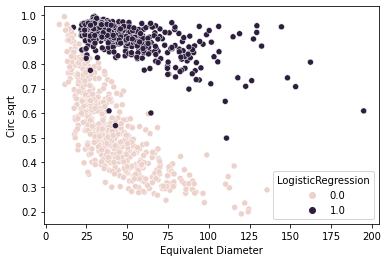

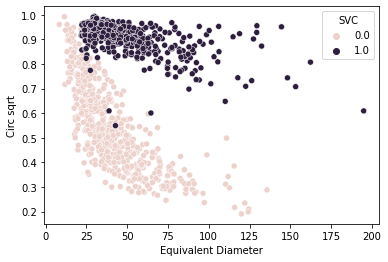

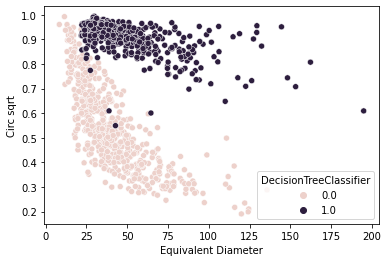

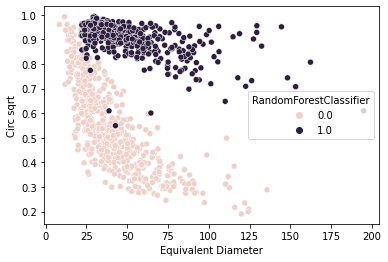

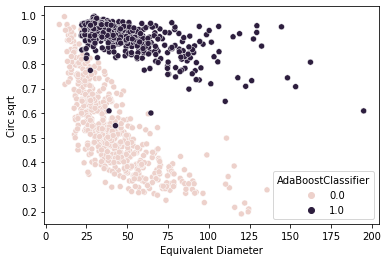

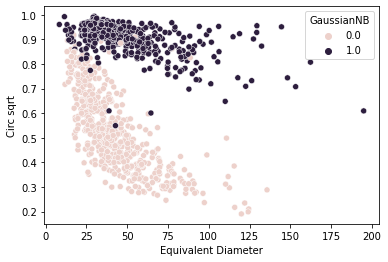

In [27]:
for columns in results.columns:
    sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=results[columns])
    plt.show()

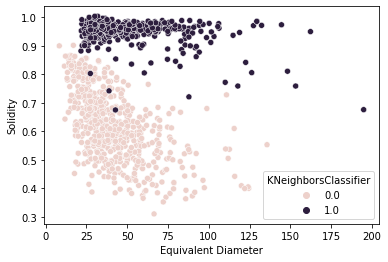

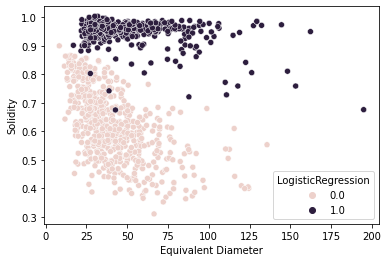

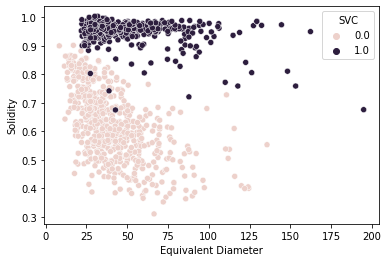

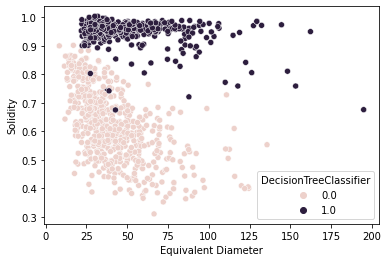

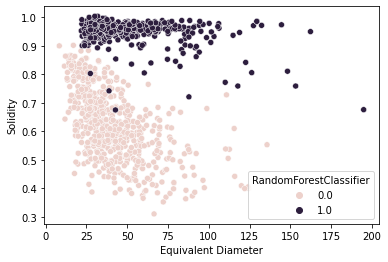

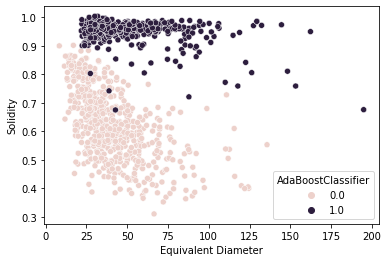

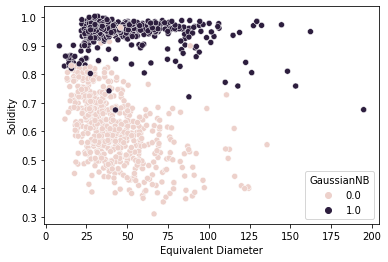

In [28]:
for columns in results.columns:
    sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=results[columns])
    plt.show()